# Simple Linear Regression
### *Predicting Life Expectancy: A Synthetic Example*

In this notebook, I generate synthetic data that will serve to illustrate how to manually compute the coefficients of a simple linear regression.

## 1. Data Generating Process

First, we must generate the synthetic data and load them to a `.csv` file for pretending to be in a credible real-world scenario. In general, empirical studies reveal that there exists a positive relationship between the average number of years of schooling `yrs_school` and the life expectancy `life_exp`. Therefore, I will generate data randomly based on this assumption. I use the following equation (where the error term $u$ is normally distributed around $0$ with $\sigma^2 = 10$):

$$
\texttt{life\_exp} = 35 + 0.02 \cdot \texttt{yrs\_school}^2 + 3.4 \cdot \sqrt{\texttt{yrs\_school}} + u
$$

In [1]:
# libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class FakeData:
    # constructor
    def __init__(self, n):
        self.n = n

    # method to generate data
    def generate_df(self, x1, x2):
        np.random.seed(19)
        
        # error term
        u = np.random.normal(0, 3, self.n)

        # model
        x = np.linspace(x1, x2, self.n)
        y = 35 + 0.02 * x**2 + 3.4 * np.sqrt(x) + u

        # create DataFrame
        df = pd.DataFrame({'yrs_school': x, 'life_exp': y})
        return df

    # method to plot x (vs) y
    def plot_xy(self, df):
        plt.figure(figsize=(8, 5))
        plt.scatter(df['yrs_school'], df['life_exp'], color='black', alpha=0.6)
        plt.title('Scatter Plot of Years of Schooling vs Life Expectancy', family="Helvetica", fontsize=14, loc='left', pad=15)
        plt.xlabel('Years of Schooling', family="Helvetica", fontsize=12)
        plt.ylabel('Life Expectancy', family="Helvetica", fontsize=12)
        plt.grid(alpha=0.3)
        plt.show()

Now that I created a small class `FakeData`, I create an instance of it to produce my data set.

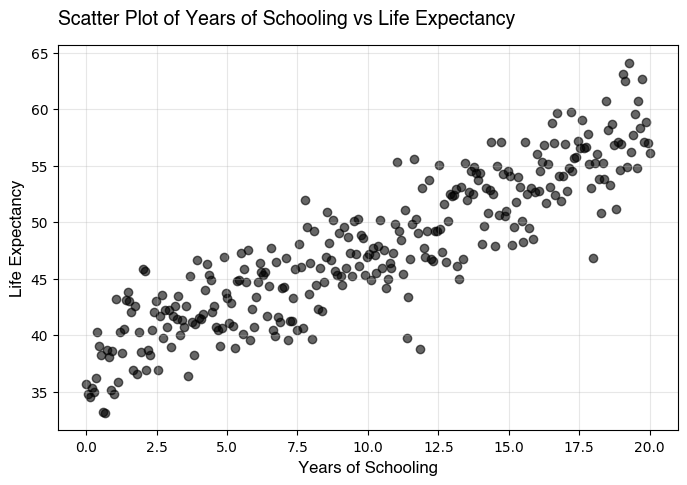

In [2]:
# create instance
data_gen = FakeData(n=300)

# generate data (plausible values for years of schooling)
data = data_gen.generate_df(0, 20)

# plot data
data_gen.plot_xy(data)

Since this seems rather credible, I save my data to a `.csv` file in the data folder of this subproject:

In [5]:
# shuffle data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# save data
data.to_csv('../data/life_expectancy_data.csv', index=False)

This is all for this notebook.